In [1]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import funciones_auxiliares_hito_2 as aux2

warnings.filterwarnings('ignore')
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv('income-db.csv')
df = df.replace('?', np.nan)

# Analisis del vector objetivo (```income```)

,Frecuencia,Porcentaje
<=50K,37155,0.760718
>50K,11687,0.239282


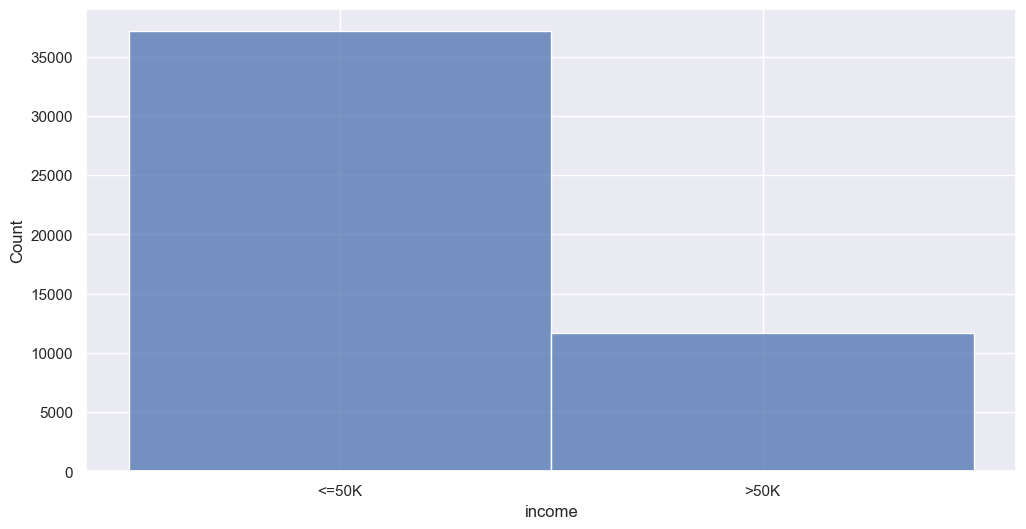

La variable presentó 0 valores faltantes


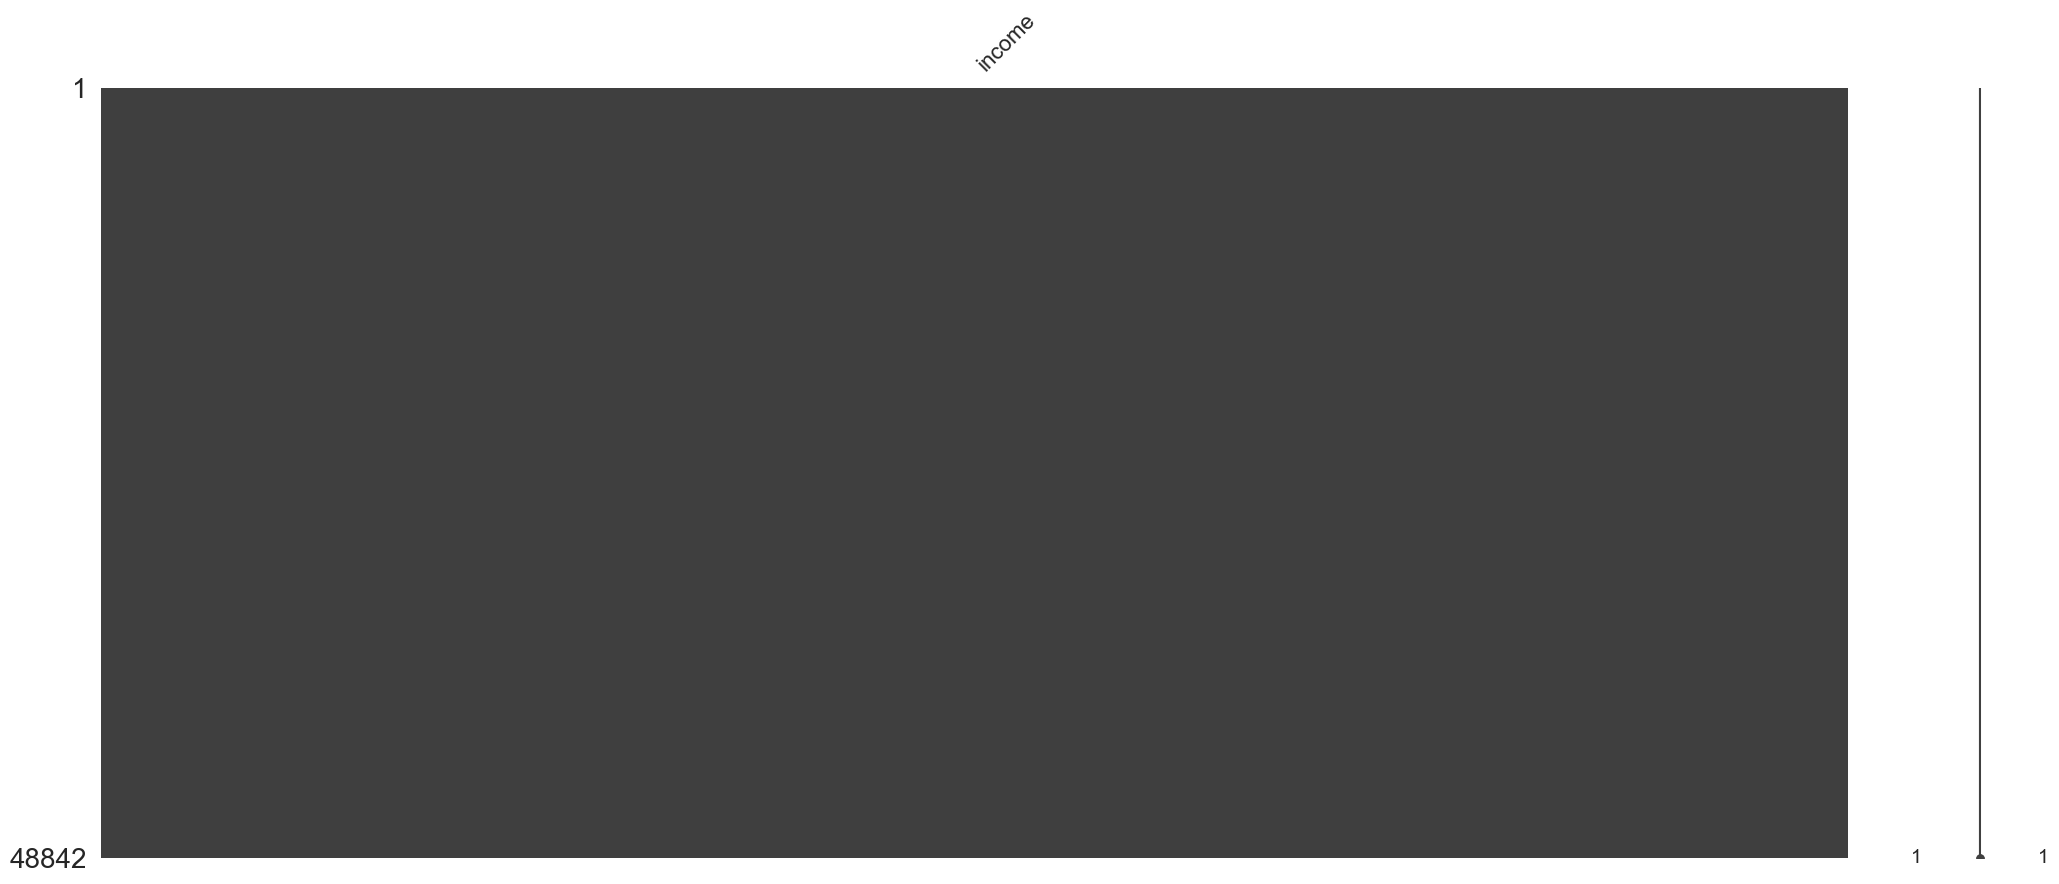

In [3]:
vector_objetivo = df['income']
aux2.analizar_vector_objetivo_discreto(vector_objetivo)

De los resultados se puede ver que existen 37155 (76% de los datos) personas que ganan igual o
menos de 50K dolares anuales. Por otro lado, existen 11687 (24% de los datos) personas que ganan
sobre los 50K dolares anuales.

Ademas, la variable carece de algun valor faltante.

Como esta variable es categorica binaria, sera recodificada de la siguiente forma:

- "<=50K" a 0 (ya que tiene la menor frecuencia)
- ">50K" a 1 (ya que tiene la mayor frecuencia)

# Analisis de variables independientes (todas menos ```income```)

Analizando todas las variables numericas 



,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


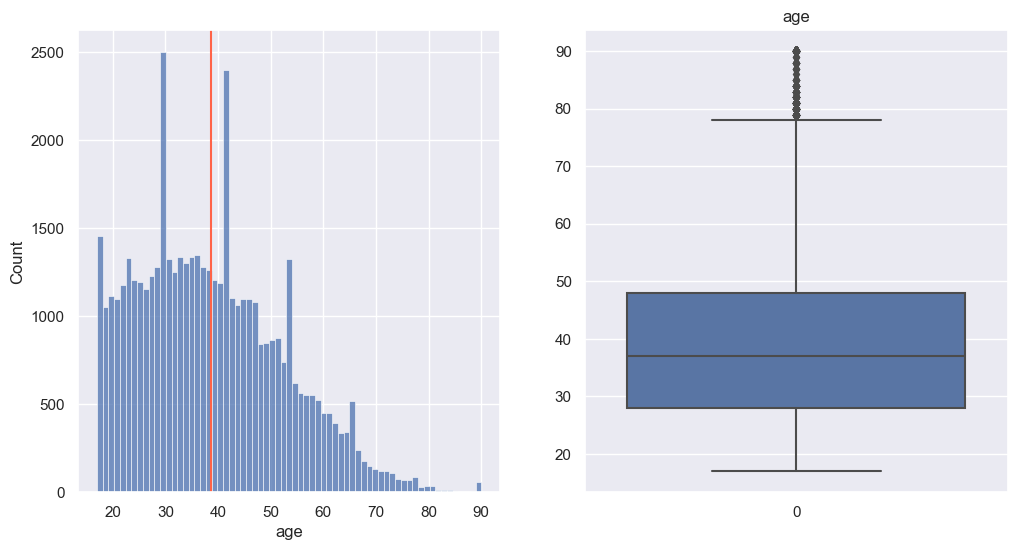

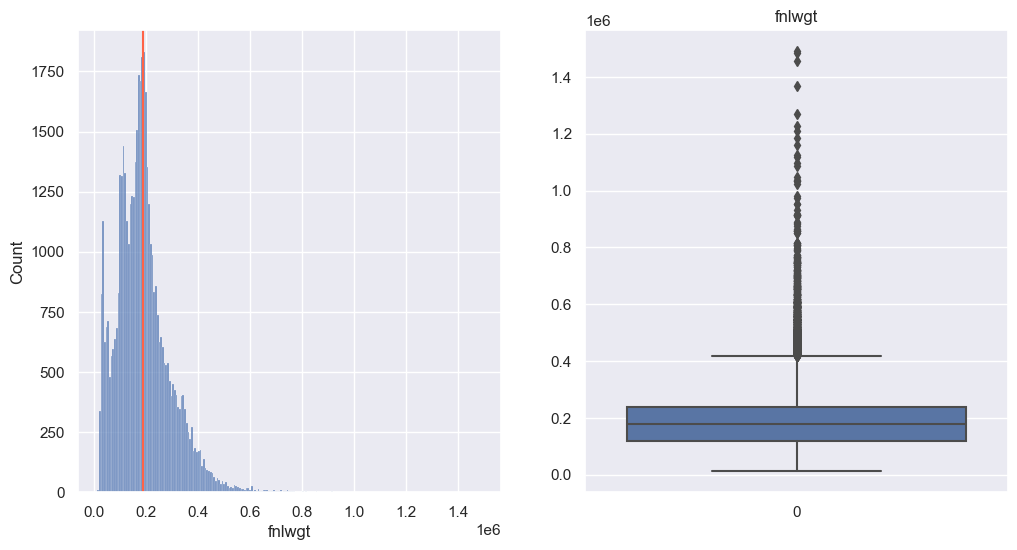

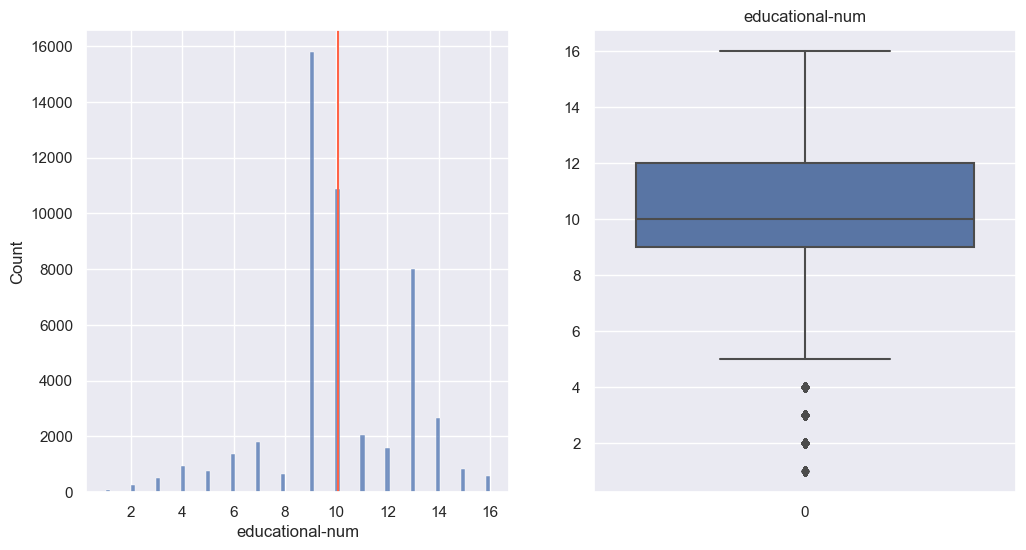

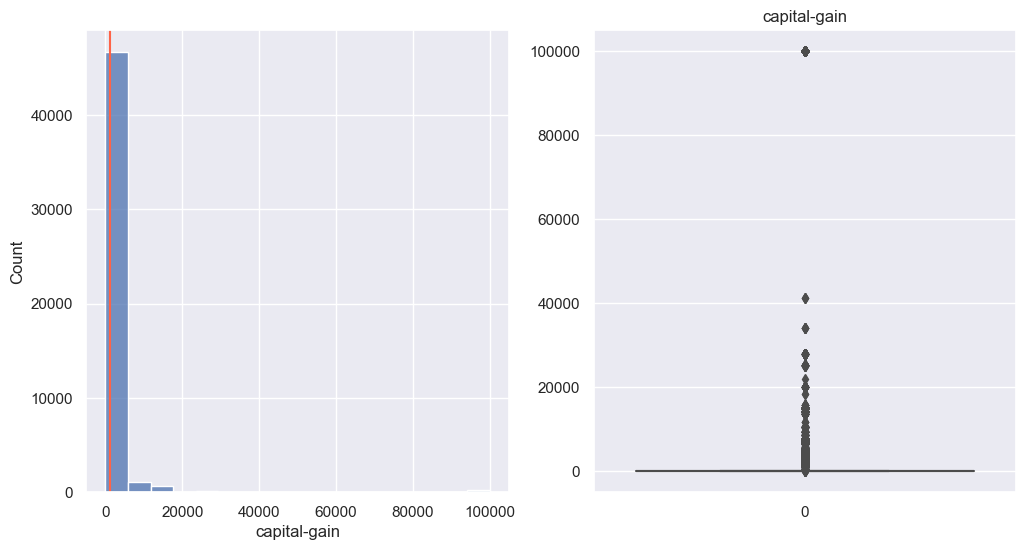

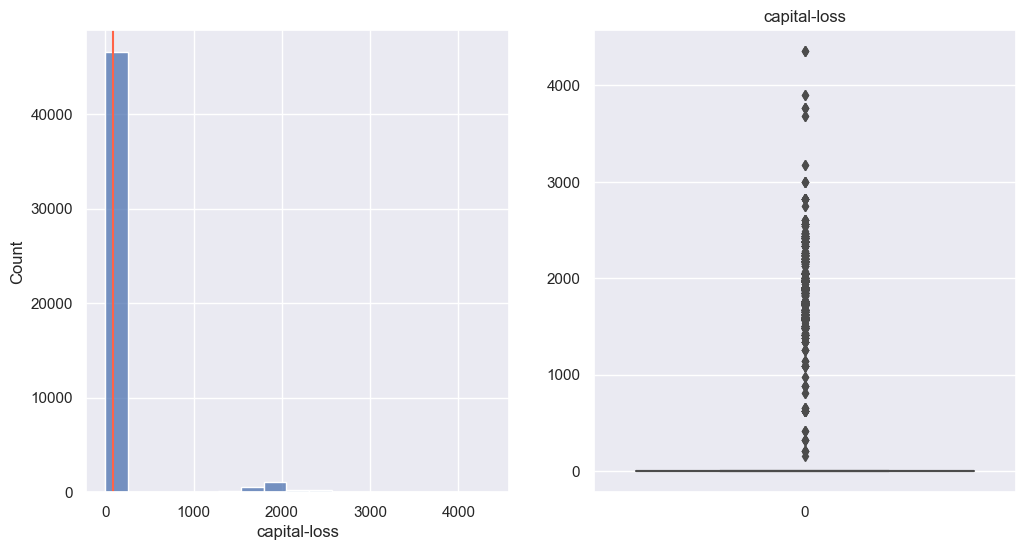

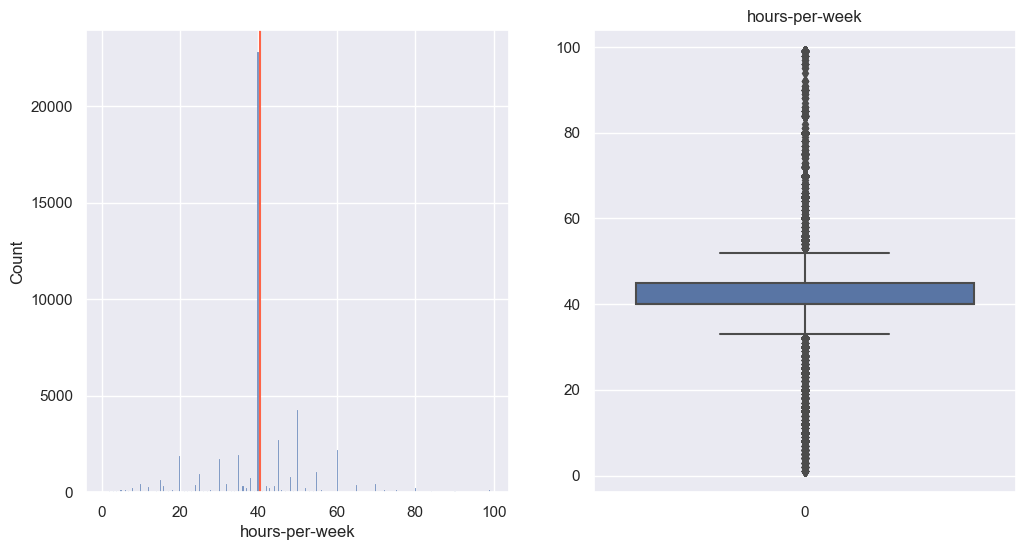

Analizando todas las variables categoricas 

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


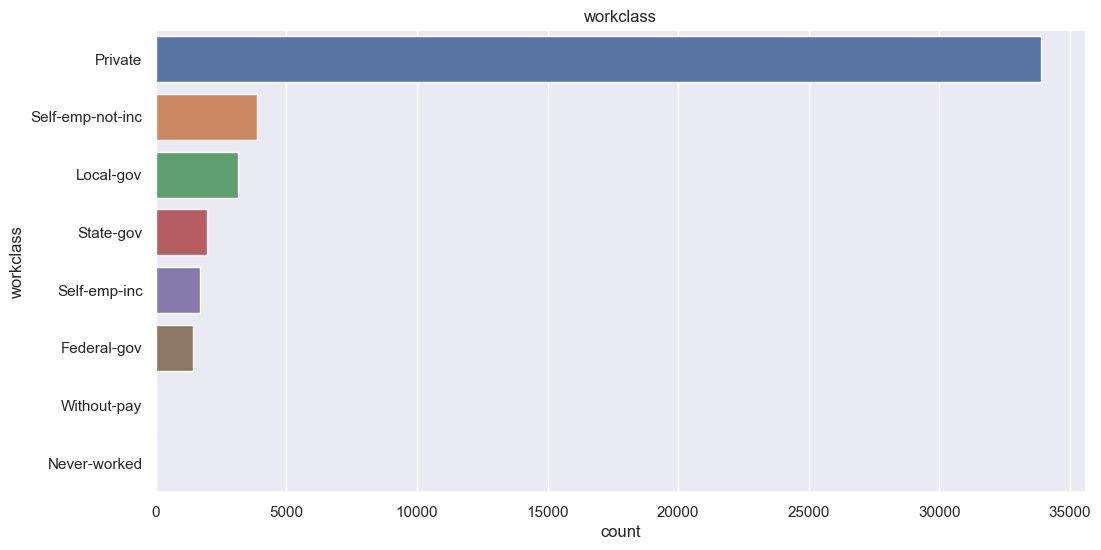

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


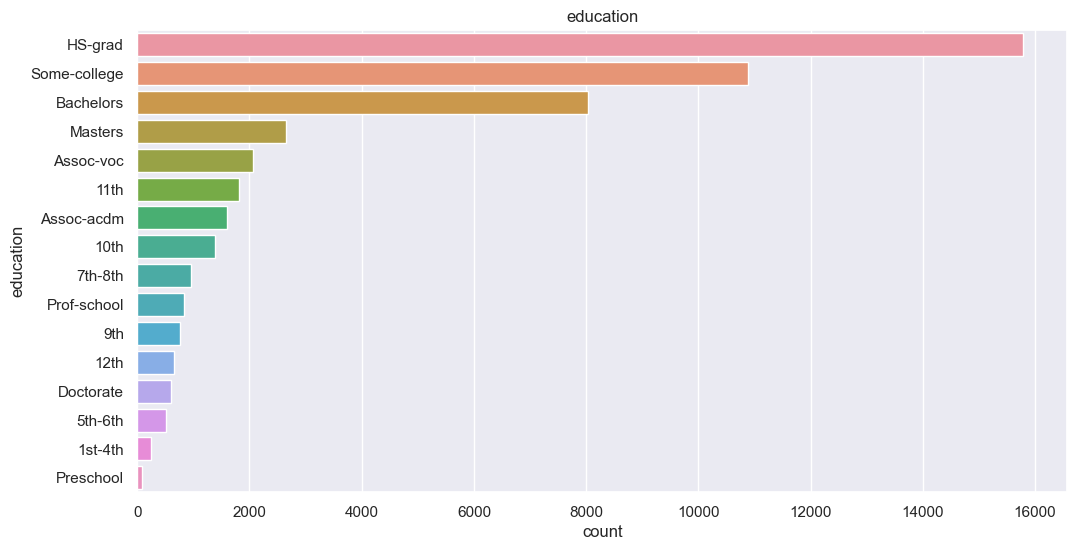

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


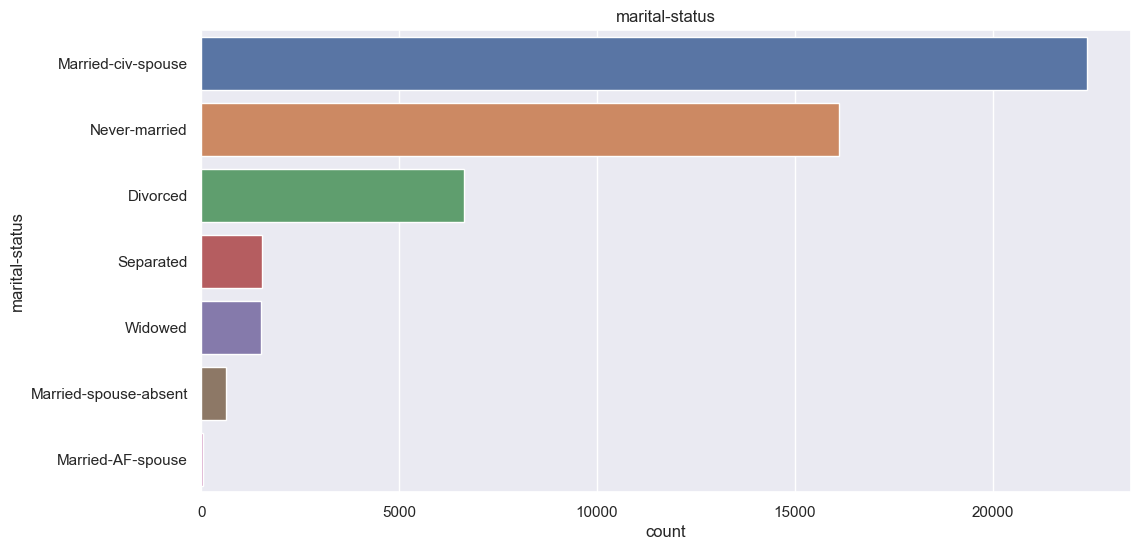

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64


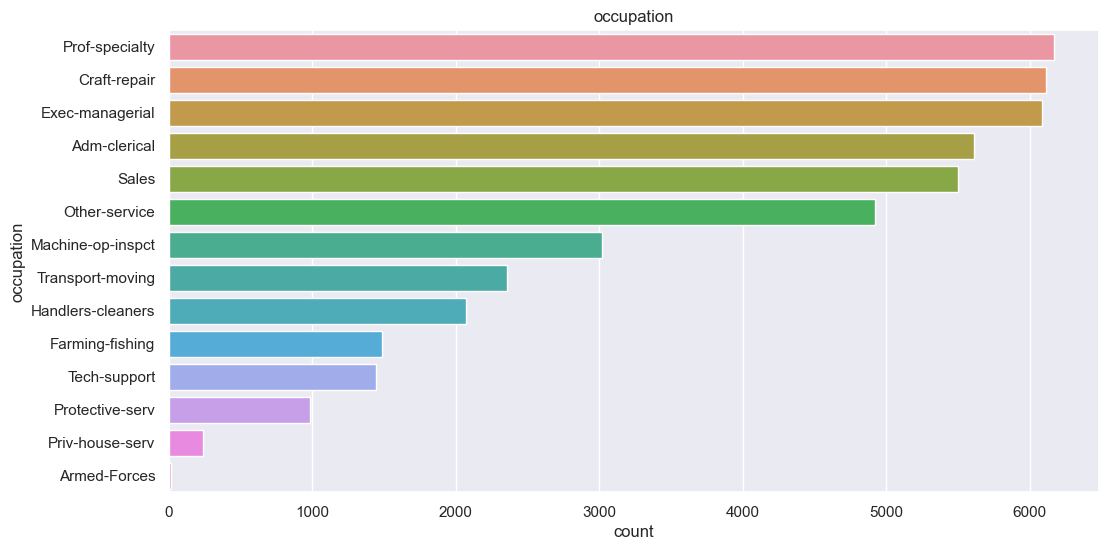

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64


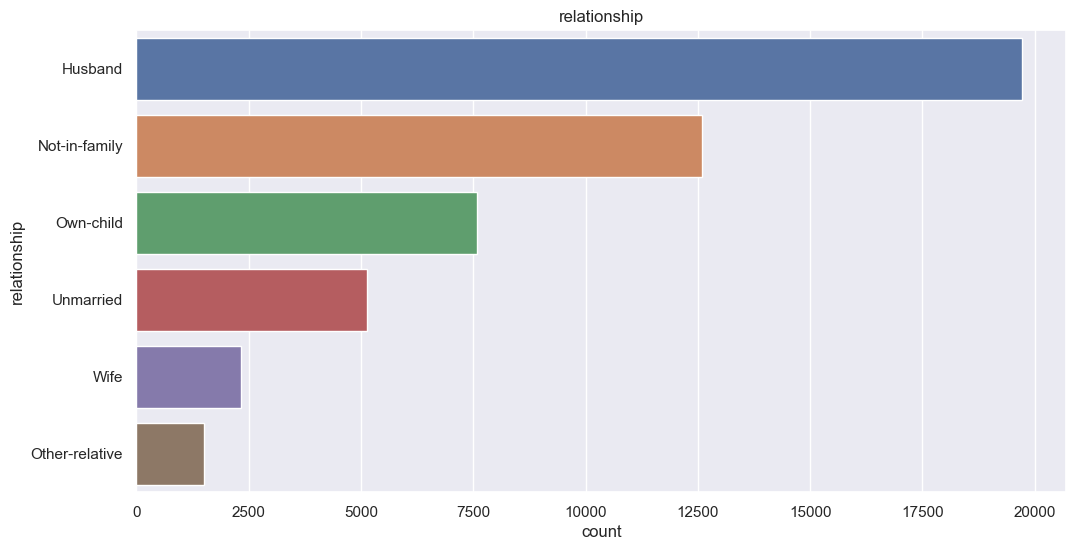

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64


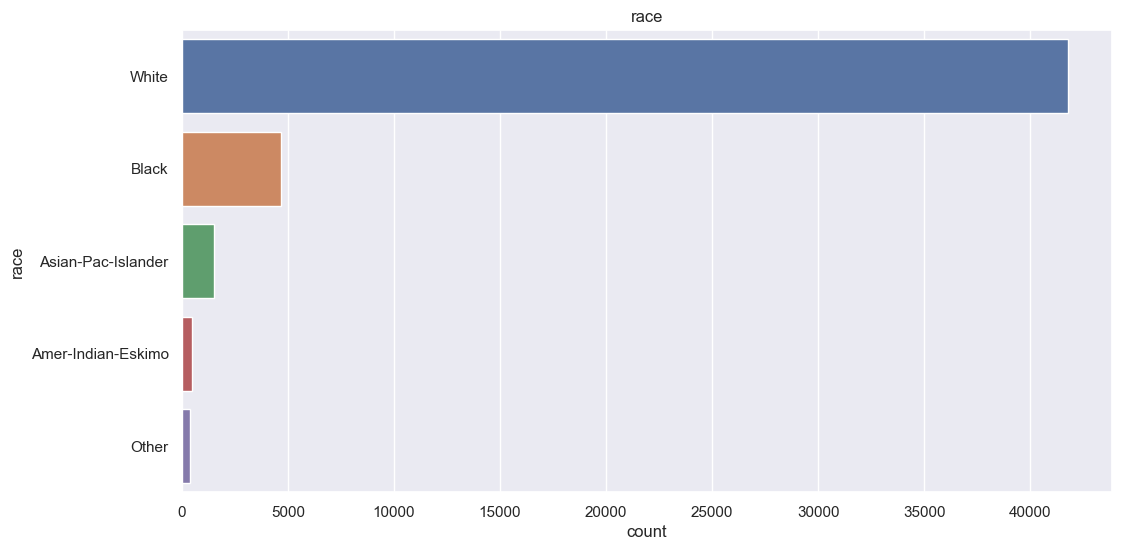

gender
Male      32650
Female    16192
Name: gender, dtype: int64


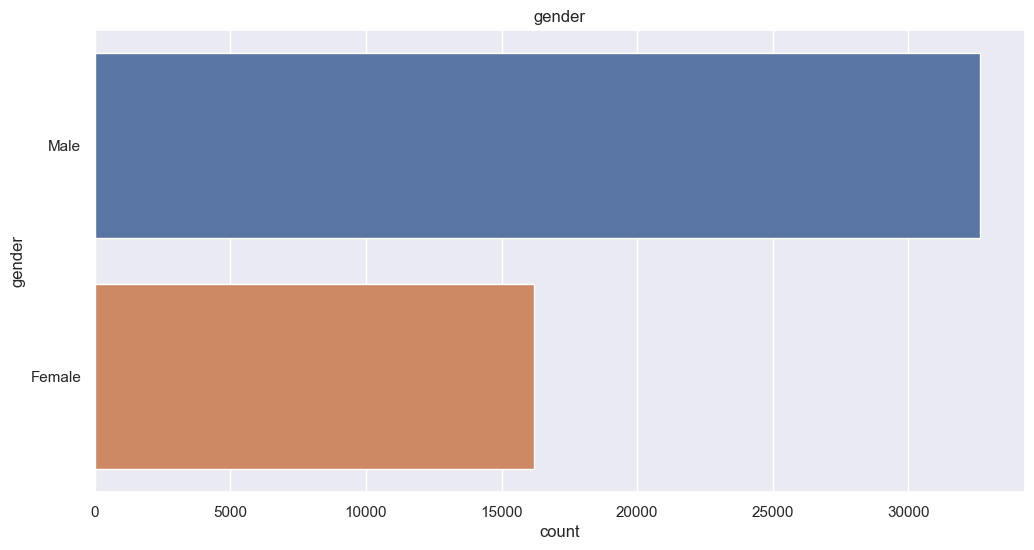

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

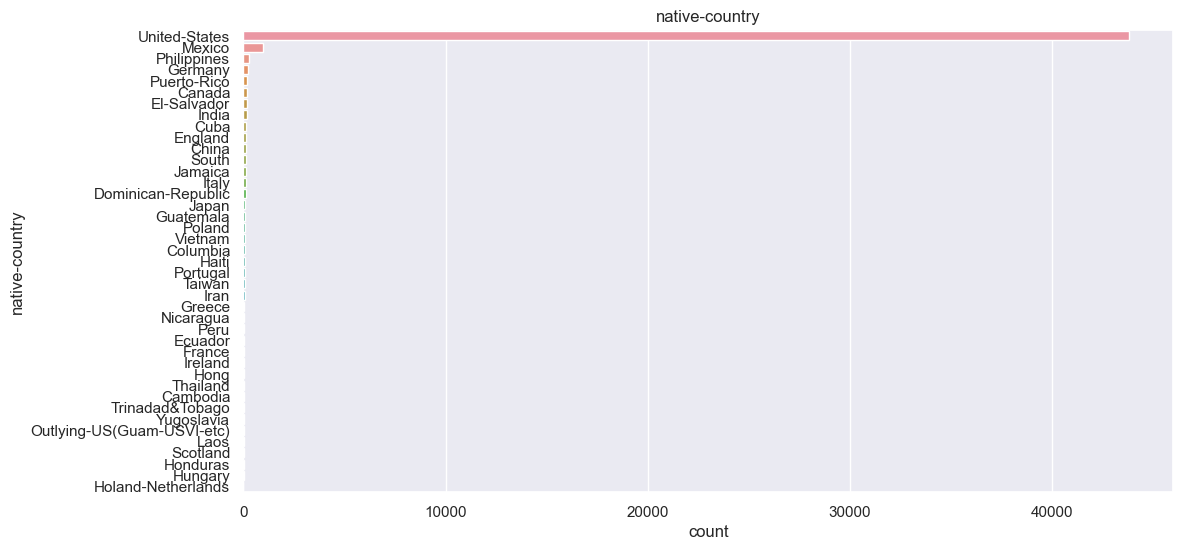

,cantidad_na,porcentaje_na
age,0,0.00
workclass,2799,5.73
fnlwgt,0,0.00
education,0,0.00
educational-num,0,0.00
marital-status,0,0.00
occupation,2809,5.75
relationship,0,0.00
race,0,0.00
gender,0,0.00


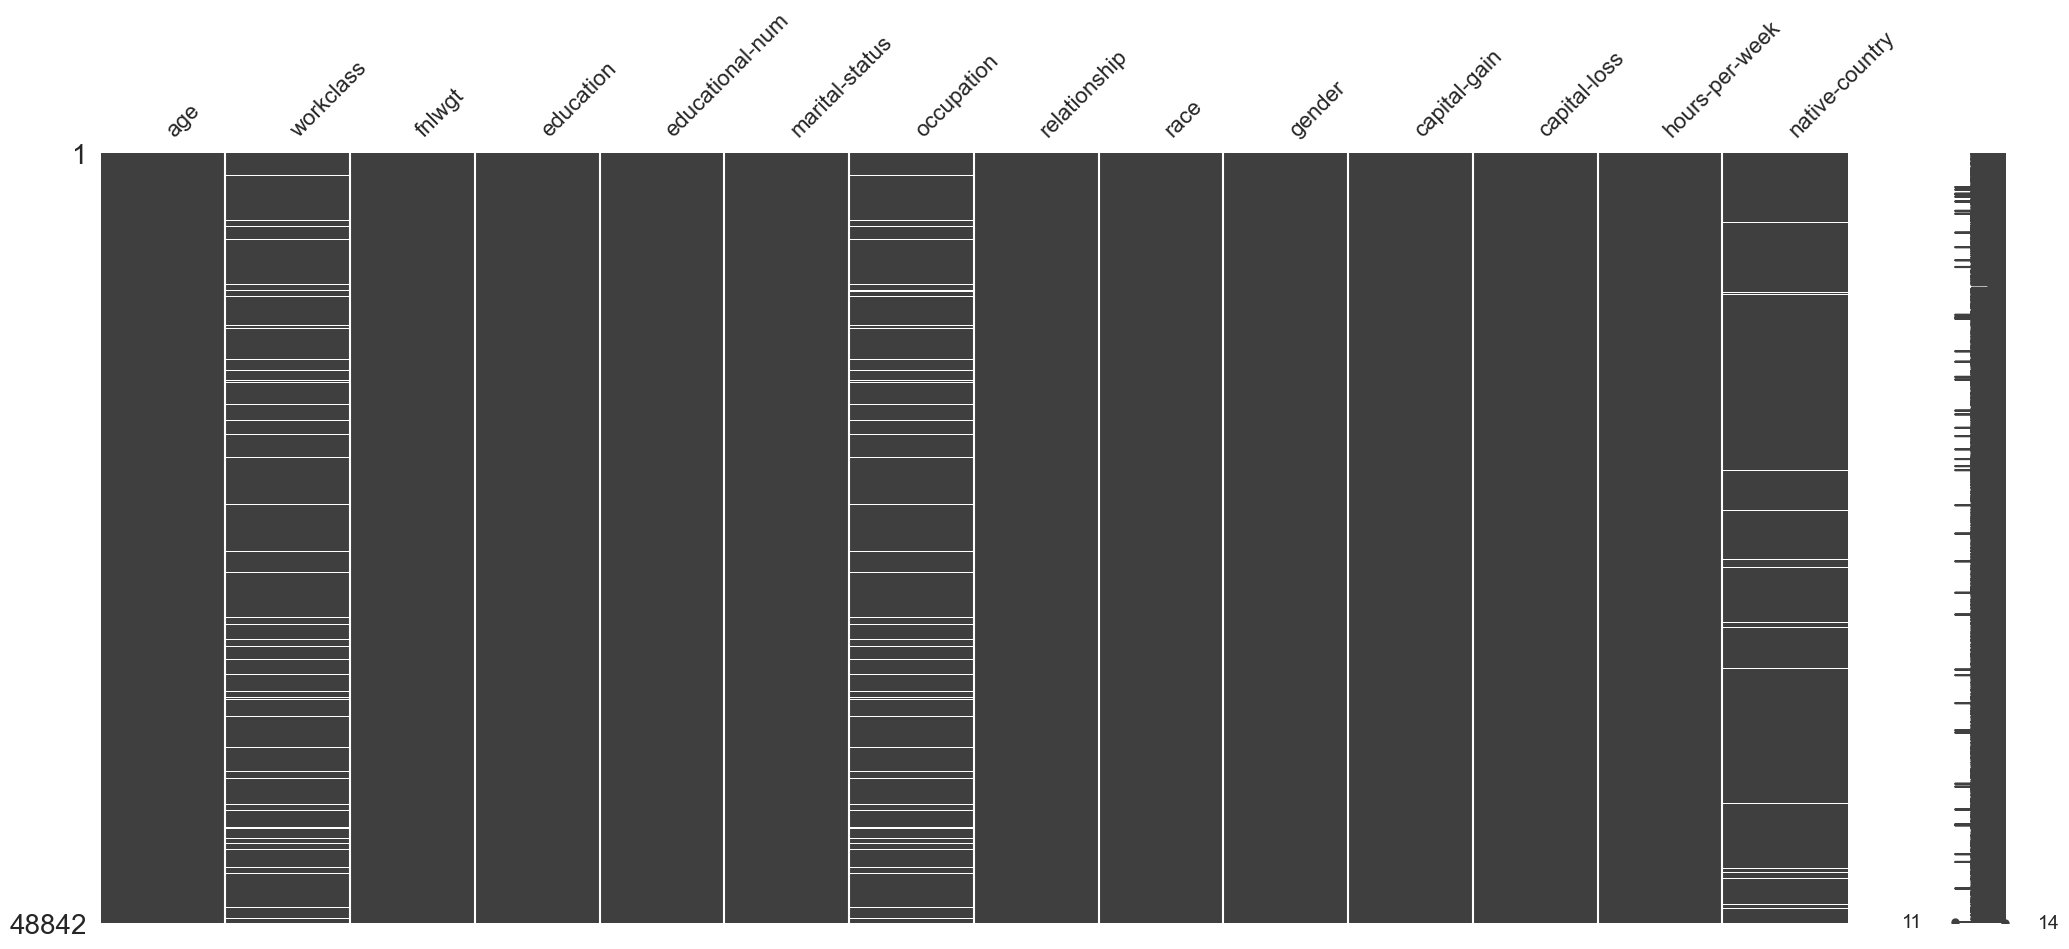

In [4]:
variables_independientes = df.drop(columns='income')
aux2.analizar_variables_indpendientes(variables_independientes)

# Analisis variables numéricas

- ```age```: Tiene una media de 38.7 años. Según el gráfico de cajas y bigotes, presenta valores
atípicos u outliers. No presenta valores faltantes.
- ```fnlwgt```: Tiene una media de 1.89 * 10^5. La mayor cantidad de datos están agrupados entre ~
0.0 y 0.4, y presenta valores atípicos. No presenta valores faltantes.
- ```educational-num```: Tiene uana media de 10.1. La mayor cantidad de datos están agrupados entre 
~ 5.7 y 16 y presenta valores atípicos. No presenta valores faltantes.
- ```capital-gain```: Tiene una media de 1079.1. La mayor cantidad de datos se encuentra entre 0 y
20000, y presenta valores atípicos. No presenta valores faltantes.
- ```capital-loss```: Tiene una media de 87.5. La mayor cantidad de datos se encuentra entre 0 y
1000, y presenta valores atípicos. No presenta valores faltantes.
- ```hours-per-week```: Tiene una media de 40.4 horas. La mayor cantidad de datos se encuentra entre
~ 37 y 50 horas y presenta valores atípicos. No presenta valores faltantes.

# Analisis variables categóricas

## Nominales no binarias

- ```workclass```: Presenta 8 valores distintos, donde Private es el que tiene una mayor frecuencia
(33906) y Never-worked es la que tiene la menor frecuencia (10). Presenta 2799 valores faltantes,
que corresponden al 5.73% de los datos de la columna.

- ```education```: Presenta 16 valores distintos, donde HS-grad es el que tiene una mayor frecuencia
(15784) y Preschool es la que tiene la menor frecuencia (83). No presenta valores faltantes.

- ```marital-status```: Presenta 7 valores distntos, donde Married-civ-spouse tiene una mayor frecuencia
(22379) y Married-AF-spouse es la que tiene la menor frecuencia (37). No presenta valores faltantes

- ```occupation```: Presenta 14 valores distintos, donde Prof-specialty tiene una mayor frecuencia
(6172) y Armed-Forces es la que tiene la menor frecuencia (15). Presenta 2809 valores faltantes,
lo que corresponde al 5.75% de los datos de la columna.

- ```relationship```: Presenta 6 valores distintos, donde Husband tiene una mayor frecuencia (19716)
y Other-relative es la que tiene la menor frecuencia (1506). No presenta valores faltantes.

- ```race```:  Presenta 5 valores distintos, donde White tiene una mayor frecuencia (41762) y Other
es la que tiene la menor frecuencia (406). No presenta valores faltantes.

- ```native-country```: Presenta 42 valores distintos, donde United-States tiene una mayor frecuencia
(43832) y Holand-Netherland tiene la menor frecuencia (1). Presenta 857 valores faltantes, lo que
corresponde al 1.75% de los datos de la columna.

## Nominales binarias

- ```gender```: Presenta 2 valores distintos, donde Male es el que tiene una mayor frecuencia (32650)
y Female tiene la menor frecuenca (16192). No presenta valores faltantes.

# Analisis valores faltantes global

In [5]:
aux2.mostrar_perdida_de_datos(df)

Al droppear todos los valores faltantes en la DataFrame se pierde el 7.41% de los datos totales


Como se pierde menos del 30% de los datos totales, entonces se procede a tratar los datos
con un .dropna() global

# Analizar correlacion entre variables disponibles

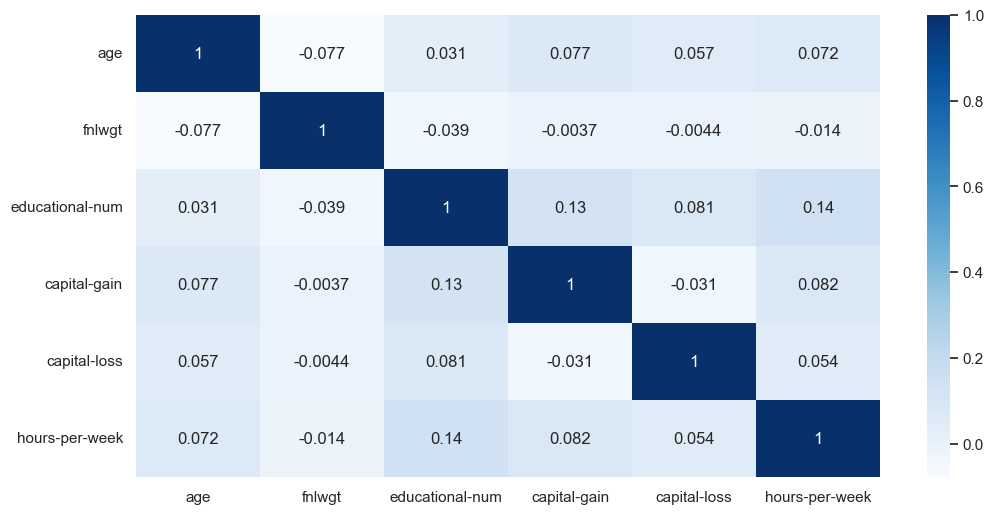

In [6]:
aux2.analizar_correlacion_todas_las_variables(df)

De forma general se puede ver que existe una correlación baja (< 0.2) entre las variables. 

# Preprocesamiento y Recodificacion

Como se mencionó en el Hito 1, y teniendo en cuenta los resultados del análisis exploratorio,
los datos serán preprocesados y recodificados de la siguiente manera:

1. Se reemplazarán todos los valores "?" con np.nan
2. Se eliminarán todas las filas que tengan un valor faltante
3. Se eliminará la columna ``` educational-num```, ya que codifica lo mismo que ```education```
3. Se recodificaran las variables mencionadas en el enunciado como se estipula. O sea: ```ocupation```, ```workclass```, ```education```, ```marital-status```, ```native-country``` e ```income``` serán recodificadas como se especifíca en el enunciado.
4. Las variables numericas (continuas y discretas) (```capital-gain```, ```capital-loss```, ```fnlwgt```, ```age```, ```education (recodificada segun enunciado)``` y ```hours-per-week```) seran dejadas tal como estan
5. Las variables categoricas binarias (```sex```, ```income```) seran recodificadas a valores 0s y 1s. La categoria con la menor cantidad de datos sera codificada a 1.
6. Las variables categoricas no binarias nominales (```workclass```, ```marital-status```, ```occupation```, ```relationship```, ```race```, ```native-country```) seran codificadas a traves del metodo Leave-One-Out Encoding 

In [7]:
df_final = aux2.preprocesar_y_recodificar_enunciado_uno(df)